In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

# Introduction

Sentiment analysis refers to the use of natural language processing, text analysis, computational linguistics, and many more to identify and quantify the sentiment of some kind of text or audio.

“Your most unhappy customers are your greatest source of learning.” 
                                            — Bill Gates
# Pre-Processing Steps for Sentiment Analysis

We start with Text preprocessing using NLTK and learn to perform steps such as :-

* Tokenization, 
* Stopwords removals
* Lemmatization
* POS Tagging



In [2]:
import nltk

# Tokenization

Tokenization is the first step in text analytics. The process of breaking down a text paragraph into smaller chunks such as words or sentence is called Tokenization. Token is a single entity that is building blocks for sentence or paragraph.

# Sentence Tokenization

Sentence tokenizer breaks text paragraph into sentences.


In [3]:
from nltk.tokenize import sent_tokenize
text="""Hello Mr. Smith, how are you doing today? The weather is great, and city is awesome.
The sky is pinkish-blue. You shouldn't eat cardboard"""
tokenized_text=sent_tokenize(text)
print(tokenized_text)

['Hello Mr. Smith, how are you doing today?', 'The weather is great, and city is awesome.', 'The sky is pinkish-blue.', "You shouldn't eat cardboard"]


# Word Tokenization

Word tokenizer breaks text paragraph into words.

In [4]:
from nltk.tokenize import word_tokenize
tokenized_word=word_tokenize(text)
print(tokenized_word)

['Hello', 'Mr.', 'Smith', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'The', 'weather', 'is', 'great', ',', 'and', 'city', 'is', 'awesome', '.', 'The', 'sky', 'is', 'pinkish-blue', '.', 'You', 'should', "n't", 'eat', 'cardboard']


# Frequency Distribution

In [5]:
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_word)
print(fdist)
print("2 most common :- ",fdist.most_common(2))

<FreqDist with 25 samples and 30 outcomes>
2 most common :-  [('is', 3), (',', 2)]


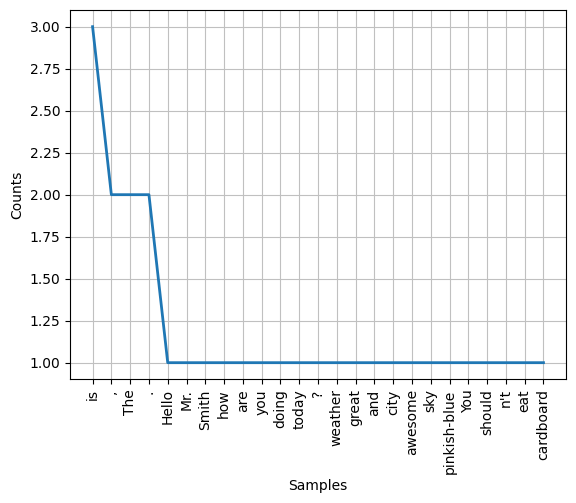

In [6]:
# Frequency Distribution Plot
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

# Stopwords

Finding/listing stopwords in English.

In [7]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
print(stop_words)

{"you'd", 'be', "aren't", 'with', 'itself', 'will', 'them', 'where', 'm', 'our', 'who', 'into', 'whom', 'than', 'on', 'yourselves', 'had', 'during', 'mightn', 'o', 'some', "haven't", 'hasn', 'mustn', 'now', 'ourselves', "that'll", 'by', 'once', 'y', 'ours', 'those', 'because', "hadn't", "shouldn't", 'wouldn', 'it', 'such', "don't", 'me', 'below', 'but', 'him', 'himself', 'needn', 've', 'here', 'no', 'same', 'in', 'd', 'or', "should've", "wouldn't", 'there', 'about', "isn't", 'your', 'out', 'off', 'don', 'too', 'when', 'haven', 't', "couldn't", 'to', "you'll", 'isn', 'won', 'i', 'under', 'll', 'didn', 'before', "needn't", 'these', 'been', 'hadn', 'how', 'nor', 'are', "she's", 'only', 'so', 'very', 'few', 'wasn', 'myself', 'at', "won't", 'any', 'why', 'what', 'which', 'between', 'a', 'do', 'until', "you've", "weren't", 'can', 'did', 'his', 'were', "doesn't", 'has', 'as', 'if', 'for', 'own', 'from', 'themselves', 'their', 'we', "shan't", 'couldn', 'then', 'herself', 'its', 'an', "hasn't",

# Removing Stopwords

In [8]:
from nltk.tokenize import word_tokenize
text="""Hello Mr. Smith, how are you doing today?"""
tokenized_sent=word_tokenize(text)
################3
filtered_sent=[]
for w in tokenized_sent:
    if w not in stop_words:
        filtered_sent.append(w)
print("Tokenized Sentence:",tokenized_sent)
print("Filterd Sentence:",filtered_sent)

Tokenized Sentence: ['Hello', 'Mr.', 'Smith', ',', 'how', 'are', 'you', 'doing', 'today', '?']
Filterd Sentence: ['Hello', 'Mr.', 'Smith', ',', 'today', '?']


# Lexicon Normalization

Lexicon normalization considers another type of noise in the text. For example, connection, connected, connecting word reduce to a common word "connect". It reduces derivationally related forms of a word to a common root word.

# Stemming

Stemming is a process of linguistic normalization, which reduces words to their word root word or chops off the derivational affixes. For example, connection, connected, connecting word reduce to a common word "connect".

In [9]:
# Stemming
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()

stemmed_words=[]
for w in filtered_sent:
    stemmed_words.append(ps.stem(w))

print("Filtered Sentence:",filtered_sent)
print("Stemmed Sentence:",stemmed_words)

Filtered Sentence: ['Hello', 'Mr.', 'Smith', ',', 'today', '?']
Stemmed Sentence: ['hello', 'mr.', 'smith', ',', 'today', '?']


# Lemmatization

Lemmatization reduces words to their base word, which is linguistically correct lemmas. It transforms root word with the use of vocabulary and morphological analysis. Lemmatization is usually more sophisticated than stemming. Stemmer works on an individual word without knowledge of the context. For example, The word "better" has "good" as its lemma. This thing will miss by stemming because it requires a dictionary look-up.


In [2]:
#Lexicon Normalization
#performing stemming and Lemmatization

from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

from nltk.stem.porter import PorterStemmer
stem = PorterStemmer()

word = "flying"
print("Lemmatized Word:",lem.lemmatize(word,"v"))
print("Stemmed Word:",stem.stem(word))

Lemmatized Word: fly
Stemmed Word: fli


# POS Tagging

The primary target of Part-of-Speech(POS) tagging is to identify the grammatical group of a given word. Whether it is a NOUN, PRONOUN, ADJECTIVE, VERB, ADVERBS, etc. based on the context. POS Tagging looks for relationships within the sentence and assigns a corresponding tag to the word.

In [11]:
# Sentence Tokenization
sent = "Albert Einstein was born in Ulm, Germany in 1879."
tokens=nltk.word_tokenize(sent)
print(tokens)
# POS Tagging
nltk.pos_tag(tokens)

['Albert', 'Einstein', 'was', 'born', 'in', 'Ulm', ',', 'Germany', 'in', '1879', '.']


[('Albert', 'NNP'),
 ('Einstein', 'NNP'),
 ('was', 'VBD'),
 ('born', 'VBN'),
 ('in', 'IN'),
 ('Ulm', 'NNP'),
 (',', ','),
 ('Germany', 'NNP'),
 ('in', 'IN'),
 ('1879', 'CD'),
 ('.', '.')]

# Sentiment Analysis of Movie Reviews

In the model the building part, you can use the "Sentiment Analysis of Movie, Reviews" dataset available on Kaggle. The dataset is a tab-separated file. Dataset has four columns PhraseId, SentenceId, Phrase, and Sentiment.

This data has 5 sentiment labels:

0 - negative 1 - somewhat negative 2 - neutral 3 - somewhat positive 4 - positive

In [12]:
# Import pandas
import pandas as pd

# Load Data

In [15]:
data=pd.read_csv('train.tsv', sep='\t')
print(data.head())

   PhraseId  SentenceId                                             Phrase  \
0         1           1  A series of escapades demonstrating the adage ...   
1         2           1  A series of escapades demonstrating the adage ...   
2         3           1                                           A series   
3         4           1                                                  A   
4         5           1                                             series   

   Sentiment  
0          1  
1          2  
2          2  
3          2  
4          2  


# Exploratory Data Analysis

In [16]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB
None


In [17]:
print(data.Sentiment.value_counts())

Sentiment
2    79582
3    32927
1    27273
4     9206
0     7072
Name: count, dtype: int64


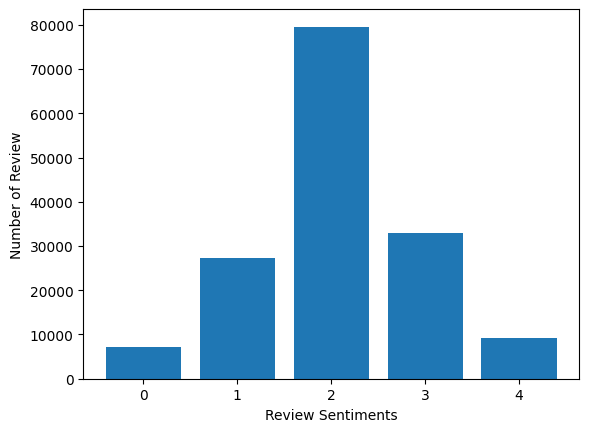

In [18]:
import matplotlib.pyplot as plt
Sentiment_count=data.groupby('Sentiment').count()
plt.bar(Sentiment_count.index.values, Sentiment_count['Phrase'])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.show()

# Feature Generation using Bag of Words

In the Text Classification Problem, we have a set of texts and their respective labels. But we directly can't use text for our model. You need to convert these text into some numbers or vectors of numbers.

Bag-of-words model(BoW ) is the simplest way of extracting features from the text. BoW converts text into the matrix of occurrence of words within a document. This model concerns about whether given words occurred or not in the document.

CountVectorizer is used to convert a collection of text documents to a matrix of token counts.

The CountVectorizer provides a simple way to both tokenize a collection of text documents and build a vocabulary of known words, but also to encode new documents using that vocabulary.

You can use it as follows:

a). Create an instance of the CountVectorizer class.

b). Call the fit() function in order to learn a vocabulary from one or more documents.

c). Call the transform() function on one or more documents as needed to encode each as a vector.

An encoded vector is returned with a length of the entire vocabulary and an integer count for the number of times each word appeared in the document.

Because these vectors will contain a lot of zeros, we call them sparse.

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(data['Phrase'])


c:\Users\vishn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [22]:
print(type(text_counts))
print(text_counts.shape)
#print(text_counts.toarray())
#print(text_counts.toarray())
#print(cv.vocabulary_)

<class 'scipy.sparse._csr.csr_matrix'>
(156060, 14988)


# Split Train and Test Set

To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

Let's split dataset by using function train_test_split(). You need to pass basically 3 parameters features, target, and test_set size. Additionally, you can use random_state to select records randomly.

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text_counts, data['Sentiment'], test_size=0.3, random_state=1)

# Model Building and Evaluation

Let's build the Text Classification Model using BoW.

First, import the MultinomialNB module and create a Multinomial Naive Bayes classifier object using MultinomialNB() function.

Then, fit your model on a train set using fit() and perform prediction on the test set using predict().

In [24]:
from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.6049169122986885


# Feature Generation using TF-IDF

In Term Frequency(TF), you just count the number of words occurred in each document. The main issue with this Term Frequency is that it will give more weight to longer documents. Term frequency is basically the output of the BoW model.


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
text_tf= tf.fit_transform(data['Phrase'])

# Split train and test set (TF-IDF)

Let's split dataset by using function train_test_split(). You need to pass basically 3 parameters features, target, and test_set size. Additionally, you can use random_state to select records randomly.



In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_tf, data['Sentiment'], test_size=0.3, random_state=123)

# Model Building and Evaluation (TF-IDF)

Let's build the Text Classification Model using TF-IDF.

First, import the MultinomialNB module and create the Multinomial Naive Bayes classifier object using MultinomialNB() function.

Then, fit your model on a train set using fit() and perform prediction on the test set using predict().

In [27]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.5865265496176684


# Conclusion

Well, you got a classification rate of 58.65% using TF-IDF features, which is not considered as good accuracy. We need to improve the accuracy by using some other preprocessing, feature engineering, or classification approaches. 

# Related Articles
https://www.kaggle.com/hassanamin/sentiment-analysis-using-nltk


# Note : 

Don't forget to like(upvote) the tutorial. Feel free to leave your thoughts in comments,